Ejercicio de proyección de runs segun bateos con SLR

In [1]:
import pandas as pd
import numpy as np

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

df = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':runs})
df.head()

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


Grafico de dispersión

Text(0.5, 1.0, 'Distribucion de bateos y runs')

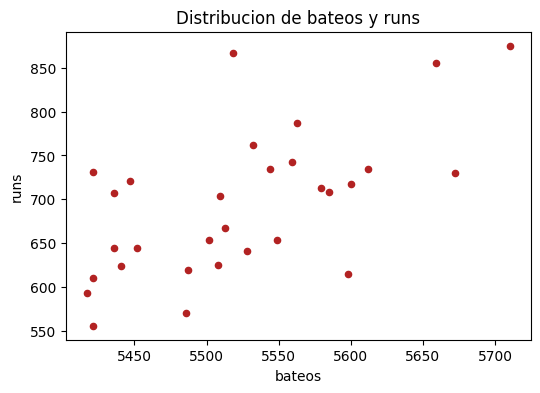

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
df.plot(
    x = 'bateos',
    y = 'runs',
    c = 'firebrick',
    kind = 'scatter',
    ax = ax
)
ax.set_title("Distribucion de bateos y runs")

Calculo de correlacion y valor P con Pearsonr

In [12]:
# Se halla la correlacion entre las variables

#Metodo 1 = corr()
df[['bateos','runs']].corr()

#Metodo 2 = Importar Perasonr
from scipy.stats import pearsonr

pr_coef, p_value = pearsonr(df['bateos'],df['runs'])
print(f'El coeficiente de relacion es: {pr_coef}')
print(f'El valor de P es: {p_value}')

# Debido a la alta correlacion y al valor pequeño de P entre las variables de bateos y runs
# se considera la Regresion Lineal como una buena opcion para hacer la prediccion


El coeficiente de relacion es: 0.6106270467206688
El valor de P es: 0.0003388351359791975


Ajuste del modelo

In [24]:
from sklearn.model_selection import train_test_split

x = df[['bateos']]
y = df[['runs']]

x_train,x_test,y_train,y_test = train_test_split(x.values.reshape(-1,1),y.values.reshape(-1,1),train_size=0.8,random_state=1234)
print(f'Numero de muestra para testeo: {x_test.shape[0]}')
print(f'Numero de muestras para entrenamiento: {x_train.shape[0]}')

Numero de muestra para testeo: 6
Numero de muestras para entrenamiento: 24


Creacion del modelo SLR

In [18]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_train,y_train)

intercepto = modelo.intercept_
slope = modelo.coef_
R2 = modelo.score(X,Y)

print(f'El intercepto en X=0: {intercepto}')
print(f'La pendiente: {slope}')
print(f'El coeficiente de determiancion R^2: {R2}')

El intercepto en X=0: [-2719.89091183]
La pendiente: [[0.61880871]]
El coeficiente de determiancion R^2: 0.3696581041080398


Predicciones con los datos de prueba

In [23]:
predicciones = modelo.predict(x_test)
print(predicciones[0:3])

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y,predicciones)
print(rmse)

[[689.12628094]
 [688.50747223]
 [736.15574303]]


ValueError: Found input variables with inconsistent numbers of samples: [30, 6]

In [26]:
df_fails.dropna(axis=0,inplace=True)
df_fails

,Duration,Average_pulse,Max_pulse,Calorie_Burnage,Hours_work,Hours_sleep
0,30.0,80.0,120,240.0,10.0,7.0
1,45.0,85.0,120,250.0,10.0,7.0
2,45.0,90.0,130,260.0,8.0,7.0
3,60.0,95.0,130,270.0,8.0,7.0
4,60.0,100.0,140,280.0,0.0,7.0
6,60.0,105.0,140,290.0,7.0,8.0
7,60.0,110.0,145,300.0,7.0,8.0
9,45.0,115.0,145,310.0,8.0,8.0
10,60.0,120.0,150,320.0,0.0,8.0
12,45.0,125.0,150,330.0,8.0,8.0


In [27]:
df_fails.info() # Despliega el tipo de datos que corresponde a cada set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 12
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         10 non-null     float64
 1   Average_pulse    10 non-null     float64
 2   Max_pulse        10 non-null     object 
 3   Calorie_Burnage  10 non-null     float64
 4   Hours_work       10 non-null     float64
 5   Hours_sleep      10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 560.0+ bytes


In [ ]:
df_fails['Max_pulse']=df_fails['Max_pulse'].astype('float') # Cambia de un tipo de dato a otro segun se requiera
print(df_fails.info())
print(df_fails)

ANALISIS DE DATOS

In [30]:
df_fails.describe()

,Duration,Average_pulse,Max_pulse,Calorie_Burnage,Hours_work,Hours_sleep
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,51.000000,102.500000,137.000000,285.000000,6.600000,7.500000
std,10.488088,15.138252,11.352924,30.276504,3.627059,0.527046
min,30.000000,80.000000,120.000000,240.000000,0.000000,7.000000
25%,45.000000,91.250000,130.000000,262.500000,7.000000,7.000000
50%,52.500000,102.500000,140.000000,285.000000,8.000000,7.500000
75%,60.000000,113.750000,145.000000,307.500000,8.000000,8.000000
max,60.000000,125.000000,150.000000,330.000000,10.000000,8.000000
